# Introduction

In this project we are focused on building the linear regression model to understand the factors affecting demand for shared bikes in American market for BoomBikes to better cater to people'e demand of shared bikes after end of quarantine situation across nation due to Covid-19 so they can stand out from other service providers and make huge profits.

---

# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

Boombikes want to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands


---

# Business Objective

To model the demand for shared bikes with the available independent variables. It will be used by the BoomBikes management to understand how exactly the demands vary with different features on which they can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

<b>Data Set :</b> Is fetched from publication [1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

---

# Solution Approach

1. Reading and Understanding the Data
2. Visualising the Data
3. Data Preparation for modelling
4. Splitting the Data into Training and Testing Sets
5. Building a linear model
6. Residual Analysis of the train data
7. Making Predictions Using the Final Mode
8. Model Evaluation

----

# <u>Importing required libraries</u>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# <u>Step 1: Reading and Understanding the Data</u>

In [2]:
# Loading data from csv

bikeshare_data = pd.read_csv("day.csv", low_memory=False)

## Data Understanding

In [3]:
# Checking rows and columns in dataset
bikeshare_data.shape

(730, 16)

In [4]:
# Checking general information about dataset, mostly to see various datatypes available in dataset
bikeshare_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Quick data view & also checking if any extra header rows present
bikeshare_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Checking if any extra rows present at bottom eg. total rows
bikeshare_data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [7]:
# Checking the columns via describe

bikeshare_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning

In [8]:
# Checking if any blank rows in dataset, if yes we would have to remove it
blank_rows = bikeshare_data[bikeshare_data.isnull().all(axis=1)]

# Print the blank rows
print(blank_rows)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


- There are no blank rows in data set as well

In [9]:
# Checking duplicate rows in data

print(bikeshare_data.duplicated().sum())

0


- There are no duplicate rows in data set

In [10]:
# Checking % of null present in all columns to see if any columns we can drop

bikeshare_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There are no columns containing NULL in it

In [11]:
# Get columns and number of unique values in bikeshare_data
unique_value_counts_per_column = bikeshare_data.nunique()

unique_value_counts_per_column.sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

- There are no columns with only 1 (single) value in it so we would need all columns

In [12]:
# Get columns with all unique values
unique_value_columns = bikeshare_data.columns[bikeshare_data.nunique() == len(bikeshare_data)]

unique_value_columns

Index(['instant', 'dteday'], dtype='object')

In [13]:
# Remove all columns which are not needed for analysis considering problem statement

# instant column is record index, we can remove it
# dteday has date which can be compensated by year, month, holiday, weekday, workingday columns

bikeshare_data.drop(['instant', 'dteday'],axis=1,inplace=True)

In [14]:
# Checking shape of bikeshare_data after to verify if column count is as expected
bikeshare_data.shape

(730, 14)

In [15]:
# Remove all columns which are not needed for analysis considering problem statement

# casual and registered adds up for the cnt column so we can remove both

bikeshare_data.drop(['casual','registered'],axis=1,inplace=True)

In [16]:
# Checking shape of bikeshare_data after to verify if column count is as expected
bikeshare_data.shape

(730, 12)

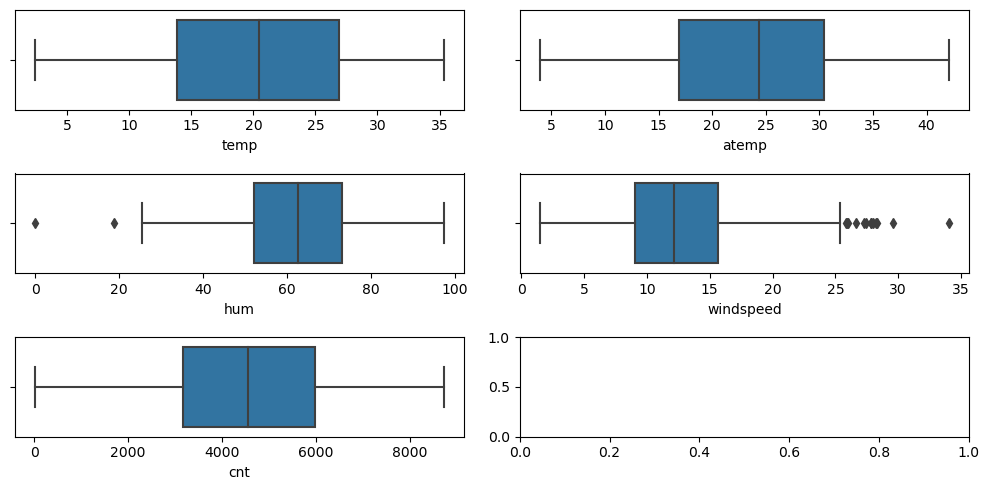

In [17]:
# Outlier Analysis
fig, axs = plt.subplots(3,2, figsize = (10,5))
plt1 = sns.boxplot(bikeshare_data['temp'], ax = axs[0,0])
plt2 = sns.boxplot(bikeshare_data['atemp'], ax = axs[0,1])
plt3 = sns.boxplot(bikeshare_data['hum'], ax = axs[1,0])
plt4 = sns.boxplot(bikeshare_data['windspeed'], ax = axs[1,1])
plt5 = sns.boxplot(bikeshare_data['cnt'], ax = axs[2,0])

plt.tight_layout()


- hum & windspeed seems to be having some outliers but it is not concerning

## Data Conversion/Encoding

In [18]:
# Encoding/mapping the season column

bikeshare_data['season'] = bikeshare_data['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [19]:
# Encoding/mapping the mnth column

bikeshare_data['mnth'] = bikeshare_data['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [20]:
# Encoding/mapping the weekday column

bikeshare_data['weekday'] = bikeshare_data['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [21]:
# Encoding/mapping the weathersit column

bikeshare_data['weathersit'] = bikeshare_data['weathersit'].map({1:'clear',2:'misty',3:'light_snow_rain',4:'heavy_snow_rain'})

In [22]:
# Checking the dataset after encoding

bikeshare_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


# <u>Step 2: Visualising the Data</u>

### Performing Exploratory Data Analysis

### Analysing Target Variables


count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
max      8714.000000
Name: cnt, dtype: float64

Median is : 4548.5


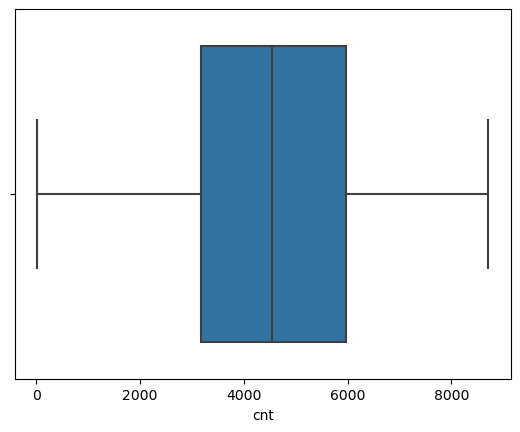

In [23]:
sns.boxplot(x='cnt', data=bikeshare_data)
print()
print(bikeshare_data['cnt'].describe())
print()
print("Median is : "+str(bikeshare_data['cnt'].median()))

<b>Analysis:</b>

On an average 4.5K rides are done by the company.

### Analysing Numerical Variables

<Figure size 1000x1000 with 0 Axes>

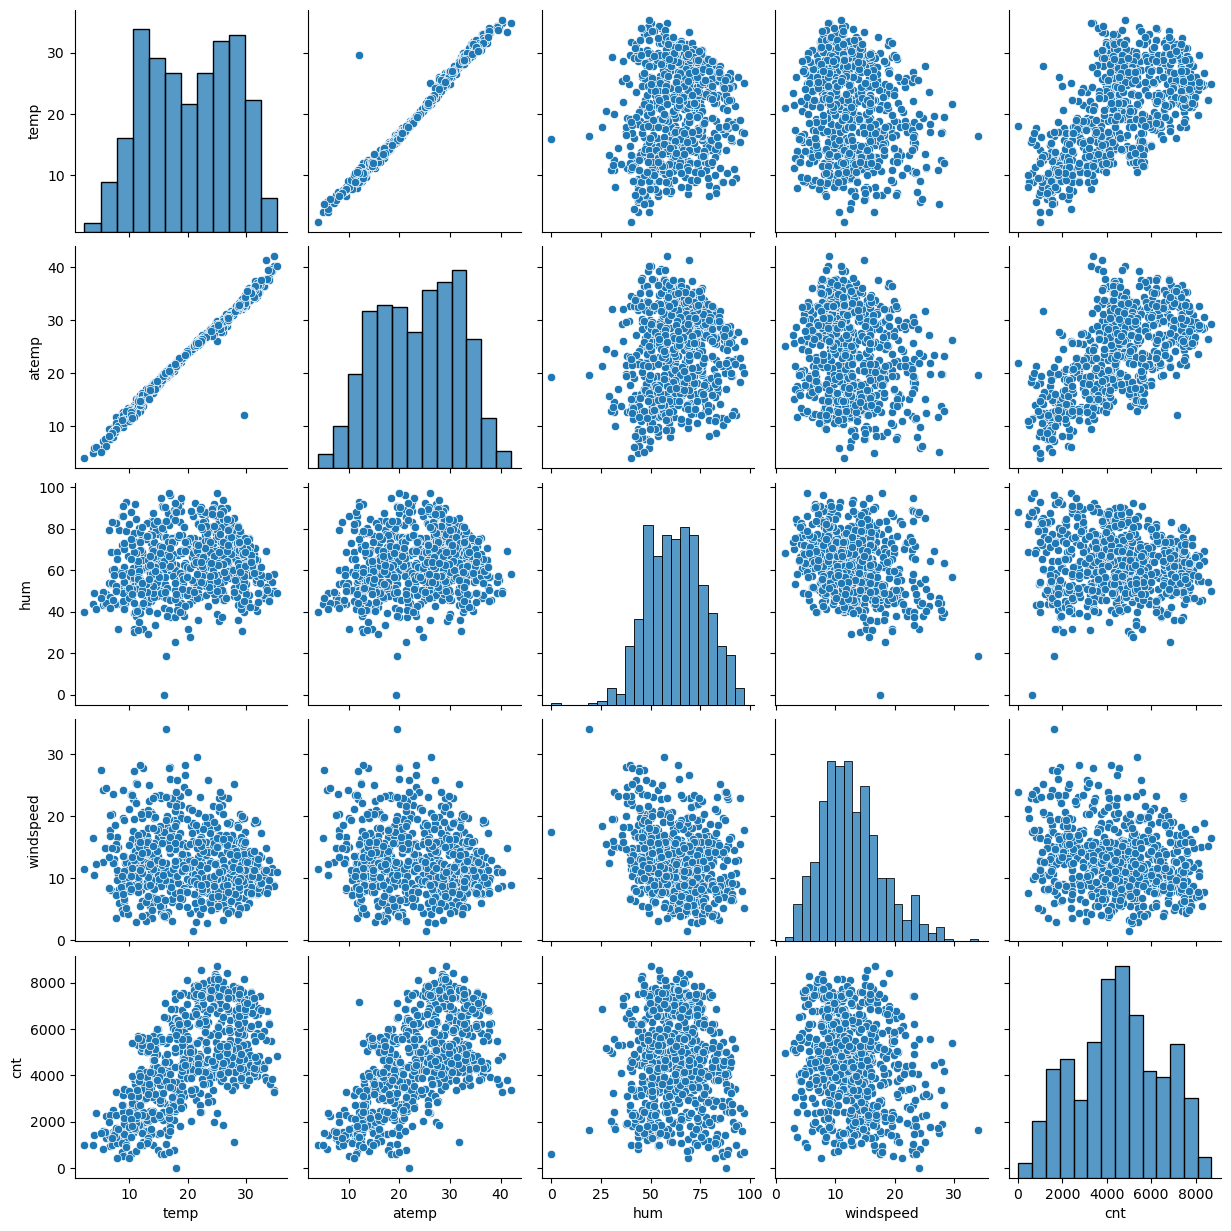

In [24]:
# Checking the scatter plot for the variables

plt.figure(figsize=(10,10))
sns.pairplot(data=bikeshare_data,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

<AxesSubplot:>

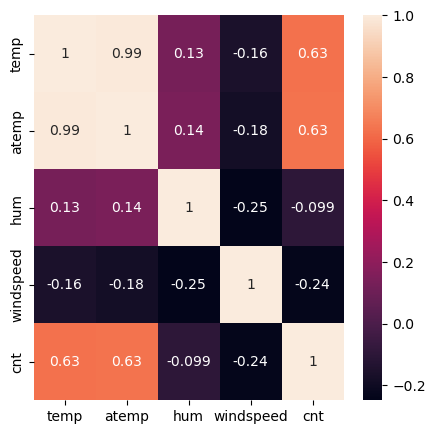

In [25]:
# Checking the correlation for the variables

plt.figure(figsize=(5,5))
sns.heatmap(data=bikeshare_data[['temp','atemp','hum','windspeed','cnt']].corr(),annot=True)

<b>Analysis:</b>

- Target variable cnt is well defined by the temp & atemp variable
- temp & atemp are highly correlated and cannot use both in model due to multicolinearity, we will decide which variable to keep based on VIF and p-value w.r.t other variables

### Analysing Categorical Variables

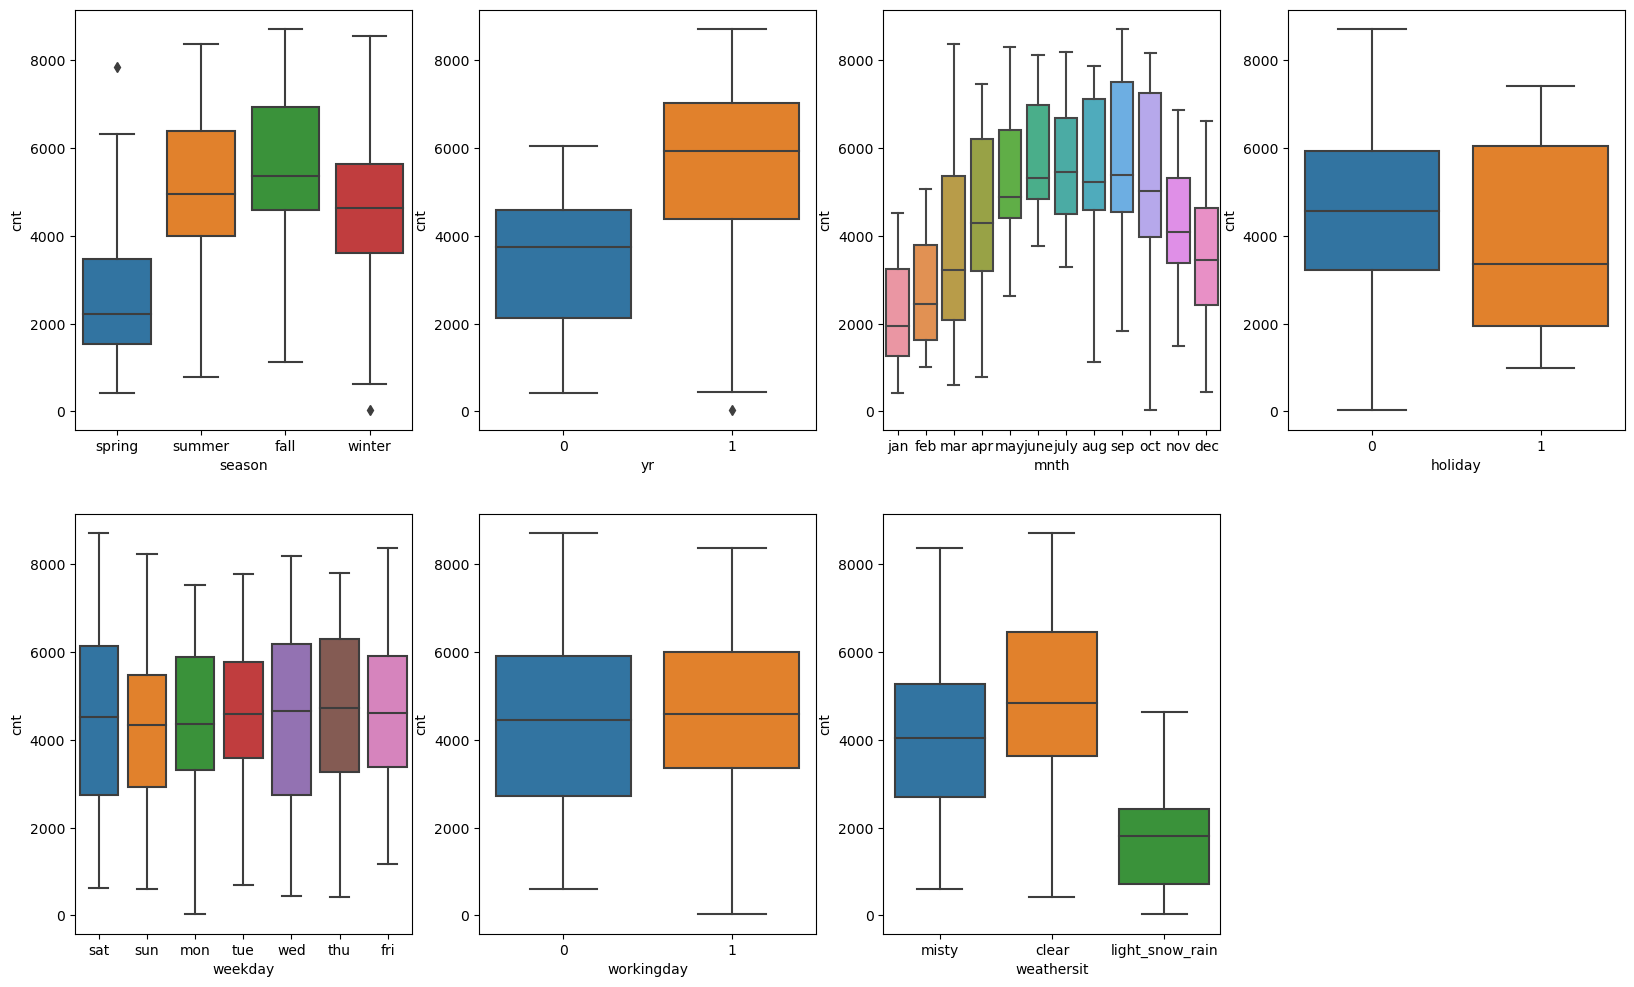

In [26]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeshare_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeshare_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeshare_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeshare_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeshare_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeshare_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeshare_data)
plt.show()

<b>Analysis:</b>

<b>Season:</b>
<br>
Business during fall is higher compared to other seasons while during spring is lowest

<b>Year:</b> 
<br>
2019 year which is represented by 1 has more business than 2018 which is represented by 0, which means business has increased in a year which is sync with growing demand of the bike sharing

<b>Month:</b> 
<br>
Most of the bookings has been done during the month of may, june, july, aug, sep and oct which is obvious at is summer and fall time in USA

<b>holiday:</b> 
<br>
During holiday the usage of bike sharing seems more and is obvious as usually on holidays people go out for spending time and ma tend to use ride share more than during weekdays and it seems people are preferring less bike sharing during weekdays (office travel)

<b>Month:</b> 
<br>
Businees seems similar during weekdays but on Thu, Fir, Sat and Sun seems to have more number of bookings as compared to the start of the week.

<b>Working Day:</b> 
<br>
Booking seemed to be almost equal either on working day or non-working day.

<b>weathersit :</b> 
<br>
Clear weather attracted more booking which is obvious.
Lesser bookings during the light snow or rain
No data for the high rain or snow.


# <u>Step 3: Data Preparation for modelling</u>

## Creating dummy variables

In [27]:
# Creating dummy variable for mnth, weekday, weathersit and season variables

months_dummies = pd.get_dummies(bikeshare_data['mnth'],drop_first=True)
weekdays_dummies = pd.get_dummies(bikeshare_data['weekday'],drop_first=True)
weathersit_dummies = pd.get_dummies(bikeshare_data['weathersit'],drop_first=True)
seasons_dummies = pd.get_dummies(bikeshare_data['season'],drop_first=True)

In [28]:
# Merging dummies with the data

bikeshare_data_new = pd.concat([bikeshare_data,months_dummies,weekdays_dummies,weathersit_dummies,seasons_dummies],axis=1)

In [29]:
bikeshare_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           730 non-null    object 
 1   yr               730 non-null    int64  
 2   mnth             730 non-null    object 
 3   holiday          730 non-null    int64  
 4   weekday          730 non-null    object 
 5   workingday       730 non-null    int64  
 6   weathersit       730 non-null    object 
 7   temp             730 non-null    float64
 8   atemp            730 non-null    float64
 9   hum              730 non-null    float64
 10  windspeed        730 non-null    float64
 11  cnt              730 non-null    int64  
 12  aug              730 non-null    uint8  
 13  dec              730 non-null    uint8  
 14  feb              730 non-null    uint8  
 15  jan              730 non-null    uint8  
 16  july             730 non-null    uint8  
 17  june            

In [30]:
# dropping columns from data for which we already created dummy variable for them

bikeshare_data_new.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [31]:
bikeshare_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   aug              730 non-null    uint8  
 9   dec              730 non-null    uint8  
 10  feb              730 non-null    uint8  
 11  jan              730 non-null    uint8  
 12  july             730 non-null    uint8  
 13  june             730 non-null    uint8  
 14  mar              730 non-null    uint8  
 15  may              730 non-null    uint8  
 16  nov              730 non-null    uint8  
 17  oct             

In [32]:
bikeshare_data_new.shape

(730, 30)

# <u>Step 4: Splitting the Data into Training and Testing Sets</u>

In [33]:
# Splitting data in training & test sets

bikeshare_data_train, bikeshare_data_test = train_test_split(bikeshare_data_new, train_size = 0.7, random_state = 100)

In [34]:
# Checking Training dataset

bikeshare_data_train.shape

(510, 30)

In [35]:
# Checking Test dataset

bikeshare_data_test.shape

(220, 30)

## Rescaling required variables

In [36]:
bikeshare_data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snow_rain,misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,0,0,0,0,0,1,0,1,0


In [37]:
# Using MinMaxScaler to Rescaling the features/variables
scaler = MinMaxScaler()

In [38]:
# Rescale all columns except the 'yes-no' and 'dummy' variables

numerical_vars = ['temp','atemp','hum','windspeed','cnt']
bikeshare_data_train[numerical_vars] = scaler.fit_transform(bikeshare_data_train[numerical_vars])

In [39]:
# Verifying data after rescaling

bikeshare_data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snow_rain,misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


# <u>Step 5: Building a linear model</u>

In [40]:
# Standard Functions used while model building

# Generic function to calculate VIF of variables
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [41]:
# Splitting train data as target variable vs features variables

y_train = bikeshare_data_train.pop('cnt')
X_train = bikeshare_data_train

## Feature selection

In [42]:
# Recursive feature elimination
# Starting with 15 variables first

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [43]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('light_snow_rain', True, 1),
 ('misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [44]:
# columns supported by RFE
cols_supported_by_rfe = X_train.columns[rfe.support_]
cols_supported_by_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'light_snow_rain', 'misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [45]:
# columns not supported by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [46]:
# dataframe with RFE selected variables
X_train_rfe = X_train[cols_supported_by_rfe]

In [47]:
# calculate VIF of the variables selected by RFE
calculateVIF(X_train_rfe)

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,misty,2.29
0,yr,2.09
9,sat,1.98


- temp, humidity & workingday features are having high VIF
- We will try to see the p-values and make decision on the features

----

## Building Models

### Building Model 1

In [48]:
X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          4.22e-191
Time:                        19:56:26   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.036      6.969      0.000       0.181       0.323
yr                  0.2305      0.008     28.795      0.000       0.215       0.246
holiday            -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday          0.0433      0.012      3.762      0.000       0.021       0.066
temp                0.5096      0.034     14.837      0.000       0.442       0.577
hum                -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed          -0.1863      0.025     -7.310      0.000      -0.236      -0.136
jan                -0.0345      0.017     -1.989      0.047      -0.069      -0.000
july               -0.0529      0.018     -2.931      0.004      -0.088      -0.017
sep                 0.0814      0.016      4.945      0.000       0.049       0.114
sat                 0.0536      0.014      3.694      0.000       0.025       0.082
light_snow_rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
misty              -0.0563      0.010     -5.439      0.000      -0.077      -0.036
spring             -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer              0.0508      0.015      3.423      0.001       0.022       0.080
winter              0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- hum (humidity) have very high VIF but the p-value is low
- temp have second highest VIF but again p-value is low

So we will try to remove the hum feature and rebuild the model as hum is having very high VIF

In [49]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,yr,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


- temp VIF have decreased after removing the humidity feature
- workingday is having second highest VIF after temp

Will see the p-values of both variables and decide of feature deletion

### Building Model 2

In [50]:
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.60e-188
Time:                        19:56:26   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1737      0.031      5.520      0.000       0.112       0.235
yr                  0.2345      0.008     29.009      0.000       0.219       0.250
holiday            -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday          0.0464      0.012      3.966      0.000       0.023       0.069
temp                0.4722      0.034     14.005      0.000       0.406       0.538
windspeed          -0.1563      0.025     -6.286      0.000      -0.205      -0.107
jan                -0.0392      0.018     -2.227      0.026      -0.074      -0.005
july               -0.0479      0.018     -2.614      0.009      -0.084      -0.012
sep                 0.0755      0.017      4.527      0.000       0.043       0.108
sat                 0.0583      0.015      3.968      0.000       0.029       0.087
light_snow_rain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
misty              -0.0813      0.009     -9.437      0.000      -0.098      -0.064
spring             -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer              0.0445      0.015      2.967      0.003       0.015       0.074
winter              0.0784      0.017      4.562      0.000       0.045       0.112
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- temp have VIF but the p-value is low
- workingday have second highest VIF but again p-value is low

From business point of view if the temperature will defintely have impact on usage of bike sharing in America.
So we will try to remove workingday first and see the impact of it on VIF & p-values

In [51]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.16
3,windspeed,4.64
10,spring,2.76
11,summer,2.24
0,yr,2.07
12,winter,1.80
4,jan,1.61
5,july,1.59
9,misty,1.56
6,sep,1.34


By Removing workingday, temp features VIF have dropped

We will cehck the p-values and decide which feature to target for removal

### Building Model 3

In [52]:
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          2.48e-186
Time:                        19:56:26   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2120      0.030      6.978      0.000       0.152       0.272
yr                  0.2347      0.008     28.620      0.000       0.219       0.251
holiday            -0.0934      0.026     -3.589      0.000      -0.144      -0.042
temp                0.4734      0.034     13.837      0.000       0.406       0.541
windspeed          -0.1570      0.025     -6.226      0.000      -0.207      -0.107
jan                -0.0386      0.018     -2.159      0.031      -0.074      -0.003
july               -0.0508      0.019     -2.735      0.006      -0.087      -0.014
sep                 0.0762      0.017      4.504      0.000       0.043       0.109
sat                 0.0201      0.011      1.787      0.075      -0.002       0.042
light_snow_rain    -0.2859      0.025    -11.619      0.000      -0.334      -0.238
misty              -0.0794      0.009     -9.097      0.000      -0.097      -0.062
spring             -0.0615      0.021     -2.902      0.004      -0.103      -0.020
summer              0.0437      0.015      2.871      0.004       0.014       0.074
winter              0.0755      0.017      4.334      0.000       0.041       0.110
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:                          -0.716   Prob(JB):                     1.03e-31
Kurtosis:                       5.160   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- saturday have increase in p-value to 0.07+
- as temp, windspeed woud add business value will try removing sat feature and see

In [53]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,yr,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,misty,1.56
6,sep,1.34


By Removing sat, temp & windspeed features VIF have dropped but slightly

We will cehck the p-values and decide which feature to target for removal

### Building Model 4

In [54]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          8.14e-187
Time:                        19:56:26   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2154      0.030      7.088      0.000       0.156       0.275
yr                  0.2343      0.008     28.517      0.000       0.218       0.250
holiday            -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp                0.4721      0.034     13.772      0.000       0.405       0.539
windspeed          -0.1549      0.025     -6.135      0.000      -0.205      -0.105
jan                -0.0383      0.018     -2.138      0.033      -0.073      -0.003
july               -0.0503      0.019     -2.706      0.007      -0.087      -0.014
sep                 0.0764      0.017      4.506      0.000       0.043       0.110
light_snow_rain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
misty              -0.0793      0.009     -9.067      0.000      -0.096      -0.062
spring             -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer              0.0434      0.015      2.845      0.005       0.013       0.073
winter              0.0757      0.017      4.335      0.000       0.041       0.110
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- jan have p-value of 0.033 will try to remove it and see

In [55]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,yr,2.07
10,winter,1.78
4,july,1.58
7,misty,1.55
5,sep,1.34
6,light_snow_rain,1.08


By Removing jan, temp & windspeed features VIF have dropped but slightly

We will cehck the p-values and decide which feature to target for removal

### Building Model 5

In [56]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          5.06e-187
Time:                        19:56:26   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030      6.746      0.000       0.141       0.258
yr                  0.2336      0.008     28.352      0.000       0.217       0.250
holiday            -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                0.4910      0.033     14.770      0.000       0.426       0.556
windspeed          -0.1479      0.025     -5.887      0.000      -0.197      -0.099
july               -0.0521      0.019     -2.790      0.005      -0.089      -0.015
sep                 0.0768      0.017      4.517      0.000       0.043       0.110
light_snow_rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
misty              -0.0802      0.009     -9.146      0.000      -0.097      -0.063
spring             -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer              0.0465      0.015      3.051      0.002       0.017       0.076
winter              0.0817      0.017      4.730      0.000       0.048       0.116
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- july have p-value of 0.005 will try to remove it and see. Else we have to target temp or windspeed features

In [57]:
# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,misty,1.55
4,sep,1.23
5,light_snow_rain,1.08
1,holiday,1.04


Now the VIF of windspeed, temp is under 5.
Will try to build model and see the p-values and R2 to see if model is significant

### Building Model 6

In [58]:
X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.47e-186
Time:                        19:56:26   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1909      0.030      6.447      0.000       0.133       0.249
yr                  0.2341      0.008     28.237      0.000       0.218       0.250
holiday            -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp                0.4777      0.033     14.423      0.000       0.413       0.543
windspeed          -0.1481      0.025     -5.854      0.000      -0.198      -0.098
sep                 0.0910      0.016      5.566      0.000       0.059       0.123
light_snow_rain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
misty              -0.0787      0.009     -8.938      0.000      -0.096      -0.061
spring             -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer              0.0621      0.014      4.350      0.000       0.034       0.090
winter              0.0945      0.017      5.630      0.000       0.062       0.127
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can consider this model i.e lr_6, as it seems to have low multicolinearity between the features/predictors and the p-values/significance for all the features seems to be significant.
F-Statistics of 248.4 is also above 1 and the probability of F-statistics of 1.47e-186 i.e almost equals to zero, states that the overall model is significant.

R2 also states 83% of cnt variance can be explained by model.

In [59]:
# Checking model parameters

lr_6.params

const              0.190855
yr                 0.234132
holiday           -0.096316
temp               0.477737
windspeed         -0.148098
sep                0.090998
light_snow_rain   -0.285031
misty             -0.078741
spring            -0.055406
summer             0.062076
winter             0.094476
dtype: float64

# <u>Step 6: Residual Analysis of the train data</u>

In [60]:
X_train_lm_6

,const,yr,holiday,temp,windspeed,sep,light_snow_rain,misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [61]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

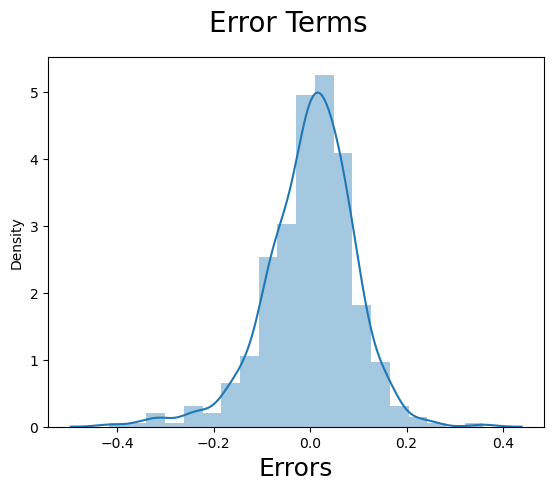

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- Error terms are following normal distribution

### Checking features Co-relation

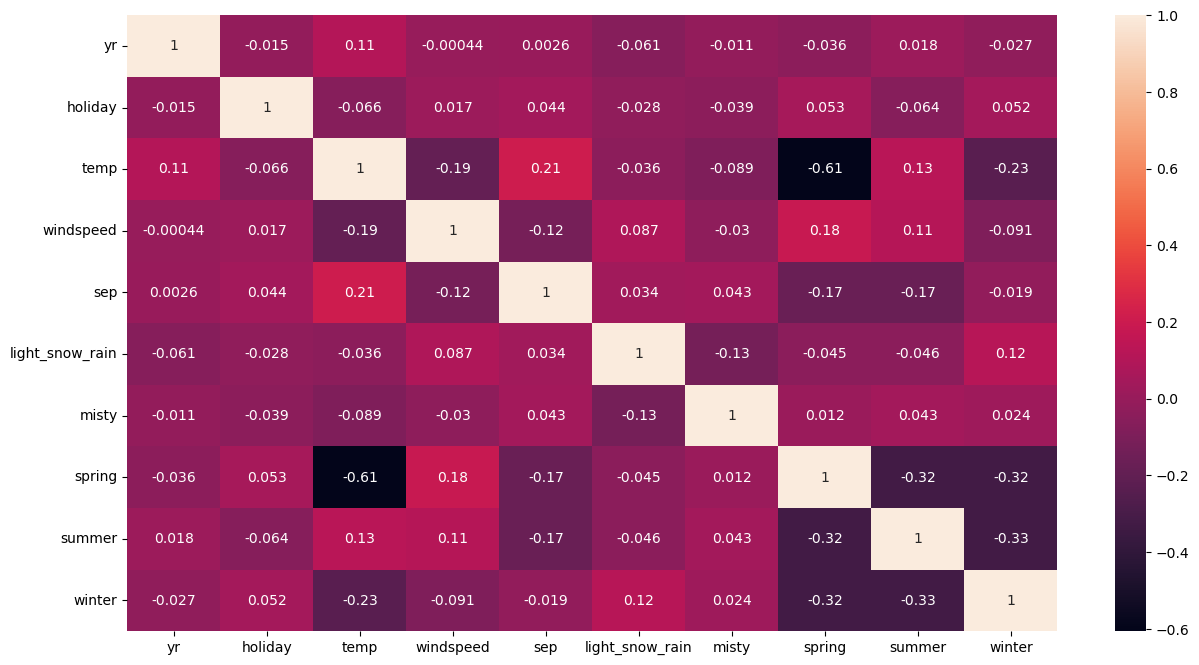

In [63]:
# Checking feature correlation

plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

- VIF of features seen above & the heatmap show lower co-relation between features

### Checking residual Homoscedasticity

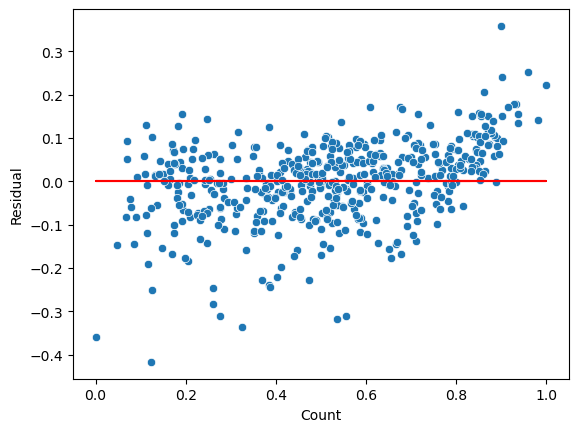

In [64]:
y_train_pred = lr_6.predict(X_train_lm_6)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- No visible pattern observed for residuals.

# <u>Step 7: Making Predictions Using the Final Mode</u>

In [65]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bikeshare_data_test[num_vars] = scaler.transform(bikeshare_data_test[num_vars])
bikeshare_data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snow_rain,misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [66]:
bikeshare_data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,light_snow_rain,misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
# Splitting test data as target variable vs features variables

y_test = bikeshare_data_test.pop('cnt')
X_test = bikeshare_data_test

In [68]:
# As x_test will have lot of columns which we have not rejected will building model on train data
# we would have to consider only those column which were present in final train data set while predicting on test data
col_from_train_data = X_train_new.columns

X_test = X_test[col_from_train_data]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [69]:
y_pred = lr_6.predict(X_test_lm)

In [70]:
# Checking r2 value for the test data
r2 = r2_score(y_test, y_pred)

print("R2 of the test data is :"+ str(r2))
print()
print("rounded off R2 of the test data is :"+ str(round(r2,3)))


R2 of the test data is :0.8038195990728842

rounded off R2 of the test data is :0.804


- For train model R2 was 0.833 & for test it is 0.804 which is good

# <u>Step 8: Model Evaluation</u>

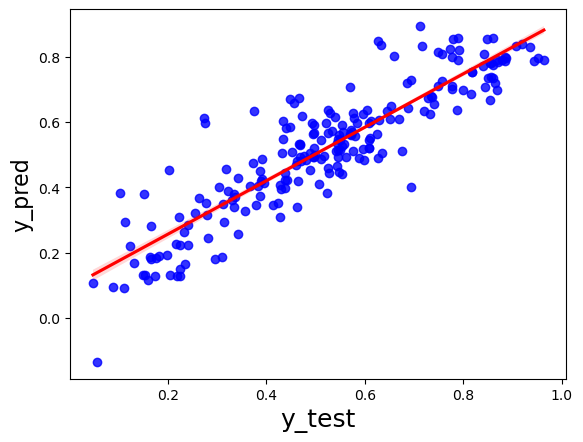

In [71]:
# Visualizing the fit on the test data of y_test & y_pred using regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

-----

# <u>Conclusion</u>

### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.833
- Test dataset R^2           : 0.804

---

### Best fitted line equation

In [72]:
# Final model parameters
rounded_coefficients = round(lr_6.params,2)

# Create a DataFrame for sorting
coefficients_df = pd.DataFrame({'Feature': rounded_coefficients.index, 'Coefficient': rounded_coefficients})

# Sort the DataFrame in descending order by absolute coefficient values
sorted_coefficients = coefficients_df.iloc[(-coefficients_df['Coefficient'].abs()).argsort()]

print(sorted_coefficients)

                         Feature  Coefficient
temp                        temp         0.48
light_snow_rain  light_snow_rain        -0.29
yr                            yr         0.23
const                      const         0.19
windspeed              windspeed        -0.15
holiday                  holiday        -0.10
sep                          sep         0.09
winter                    winter         0.09
misty                      misty        -0.08
spring                    spring        -0.06
summer                    summer         0.06


### We can see that the equation of our best fitted line is:
    
### $ cnt = 0.19 + 0.48 \times  temp - 0.29  \times  light_snow_rain + 0.23 \times yr - 0.15 \times windspeed - 0.10 \times holiday + 0.09 \times sep + 0.09 \times winter - 0.08 \times misty - 0.06 \times spring + 0.06 \times summer $

---

### Final recommended variables significant in predicting the demand for shared bikes

- __temp__
    - Demand is postively related with temperature
<br>
- __yr__
    - Year, yearwise there is growth in demand
<br>
- __sep__
    - demand seems to be more during september month
<br>
- __winter__
    - Demand is postively related with winter season
<br>
- __summer__
    - Demand is postively related with summer season
<br>
- __light_snow_rain__
    - Demand is negatively related with weathersit being Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<br>
- __windspeed__
    - Demand is negatively related with wind speed
<br>
- __holiday__
    - Demand is negatively related with holiday, seems people wish to spend time with family
<br>
- __misty__
    - Demand is negatively related with weathersit being Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
<br>
- __spring__
    - Demand is negatively related with winter season